## Importing libraries

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
np.set_printoptions(threshold = np.inf)

## Read data set

In [73]:
dataSet=pd.read_csv('train.csv')
dataSetTest=pd.read_csv('test.csv')
X_test=dataSetTest[['Pclass','Sex','Age','SibSp','Parch','Fare']].values
X=dataSet[['Pclass','Sex','Age','SibSp','Parch','Fare']].values
y=dataSet['Survived'].values


## Taking care of missing values

In [75]:
print(dataSet.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [83]:
for i in dataSet:
    Initial=dataSet.Name.str.extract('([A-Za-z]+\.)')
Initial=np.array(Initial)
initialDataFrame=pd.DataFrame(Initial,columns=['Initial'])
initialDataFrame
print(initialDataFrame.count())

Initial    891
dtype: int64


In [64]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
#this is for embarked
#imputerlast=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
#imputerlast.fit(X[:,-1].reshape(-1,1))
imputer.fit(X[:,2:5])

SimpleImputer()

In [65]:
#X[:,-1]=imputerlast.transform(X[:,-1].reshape(-1,1)).ravel()
#X_test[:,-1]=imputerlast.transform(X_test[:,-1].reshape(-1,1)).ravel()
X[:,2:5]=imputer.transform(X[:,2:5])
X_test[:,2:5]=imputer.transform(X_test[:,2:5])
X_test[:,5]=imputer.fit_transform(X_test[:,5].reshape(-1,1)).ravel()


## Encode features

In [68]:
labelEnc=LabelEncoder()
print(labelEnc.fit_transform(X[:,0]))
X[:,0]=labelEnc.fit_transform(X[:,0])
X_test[:,0]=labelEnc.fit_transform(X_test[:,0])
X[:,1]=labelEnc.fit_transform(X[:,1])
X_test[:,1]=labelEnc.fit_transform(X_test[:,1])

[2 0 2 0 2 2 0 2 2 1 2 0 2 2 2 1 2 1 2 2 1 1 2 0 2 2 2 0 2 2 0 0 2 1 0 0 2
 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 0 1 0 0 1 2 1 2 2 0 0 2 0 2 1 2 2 2 1 2 1 2
 2 2 2 2 1 2 2 2 2 0 1 2 2 2 0 2 2 2 0 2 2 2 0 0 1 1 2 2 0 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 1 0 2 1 2 1 1 0 2 2 2 2 2 2 2 2 1 1 1 0 0 2 0 2 2 2 2 1 1 2 2
 1 1 1 0 2 2 2 0 2 2 2 2 2 1 2 2 2 2 0 2 0 2 0 2 2 2 0 2 2 0 1 2 2 1 2 1 2
 0 2 0 2 2 1 1 2 1 0 0 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 1 2 1 2 0 2 1 0 1 2 1
 2 2 0 2 1 2 1 2 0 2 1 2 1 2 1 1 1 1 2 2 1 2 2 0 2 1 0 1 2 2 0 2 2 2 0 0 0
 1 2 2 0 0 2 1 2 2 0 0 0 2 1 0 2 0 2 1 2 2 2 2 2 2 0 2 2 2 1 2 0 0 1 2 2 0
 2 0 0 0 2 2 2 1 2 0 0 0 1 0 0 0 1 2 1 2 1 1 0 0 2 2 1 1 2 0 2 1 2 0 2 0 0
 2 0 2 0 0 2 0 1 0 1 1 1 1 1 2 2 2 2 0 2 2 2 2 0 1 2 2 2 1 2 2 2 2 0 2 2 0
 0 2 2 0 2 0 2 0 2 2 0 2 2 0 2 1 2 1 2 1 0 2 2 0 2 2 2 1 1 1 2 2 2 2 2 1 2
 1 2 2 2 2 0 1 2 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 0 2 1 2 0 0 2 1 0 1 1 2 2 1
 2 0 1 0 2 0 1 2 0 0 2 2 0 0 1 2 0 2 0 1 2 2 1 0 2 2 2 2 1 1 2 0 1 2 2 2 2
 1 2 2 0 2 0 0 2 2 2 2 0 

In [18]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
X_train=np.array(ct.fit_transform(X_train))
X_train_test=np.array(ct.transform(X_train_test))
X_test=np.array(ct.transform(X_test))
print(X_train_test)

ValueError: Found unknown categories [-0.47229488019189403, -0.4941603014465734, 0.14173921527985, 3.726276775811457, -0.3270161077979945, -0.45132962639201407, -0.3795913903654257, -0.48072854514504726, -0.43912822997412204, 0.866820169258505, 0.002602415148500854, -0.12310262868132209, 0.12405033516370496, 0.048463784996293086, -0.11606048896397234, 0.34024775880547814, -0.06266562161782642, -0.029335840616761092, -0.47786294656623174] in column 0 during transform

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_train_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

## Feature scaling

In [70]:
sc_x=StandardScaler()
X_train[:,-1]=sc_x.fit_transform(X_train[:,-1].reshape(-1,1)).ravel()
X_train_test[:,-1]=sc_x.transform(X_train_test[:,-1].reshape(-1,1)).ravel()
X_test[:,-1]=sc_x.transform(X_test[:,-1].reshape(-1,1)).ravel()


In [31]:
print(X_train)

[[0 1 49.0 1.0 0.0 0.48626356787088376]
 [2 0 15.0 1.0 0.0 -0.34855330205496315]
 [0 0 29.69911764705882 0.0 0.0 1.5466942419536653]
 [2 1 29.0 0.0 0.0 -0.4798283776902479]
 [2 1 42.0 0.0 0.0 -0.4842505977192841]
 [2 0 18.0 1.0 0.0 -0.28279390750763184]
 [2 1 21.0 0.0 0.0 -0.46688994460084976]
 [1 0 44.0 1.0 0.0 -0.12162855533831002]
 [1 1 28.0 0.0 0.0 -0.3771346014604056]
 [1 1 37.0 1.0 0.0 -0.12162855533831002]
 [2 0 39.0 0.0 5.0 -0.06020883271280627]
 [1 0 34.0 1.0 1.0 0.006124467722737771]
 [1 1 30.0 0.0 0.0 -0.3771346014604056]
 [1 1 66.0 0.0 0.0 -0.4262703795608086]
 [0 0 29.69911764705882 1.0 0.0 2.24712475877491]
 [2 1 43.0 0.0 0.0 -0.4744234420992035]
 [2 1 29.69911764705882 0.0 0.0 -0.46140246090259673]
 [2 1 24.0 0.0 0.0 -0.48531586138850086]
 [2 1 18.0 0.0 0.0 -0.4794195680164525]
 [2 0 29.69911764705882 1.0 0.0 -0.15798903113260826]
 [2 1 29.69911764705882 0.0 0.0 -0.4744234420992035]
 [2 1 29.69911764705882 0.0 0.0 -0.4940777533393647]
 [2 1 29.69911764705882 0.0 0.0 0.47

## Heatmap(Corelation)

In [71]:
X=pd.DataFrame(X_train,columns=['Pclass','Sex','Age','SibSp','Parch','Fare'])

<Axes: >

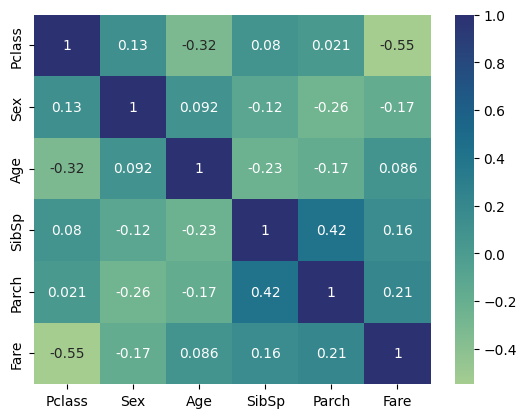

In [72]:
sns.heatmap(X.corr(),annot=True,cmap='crest')

## SVM

In [42]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')
classifier.fit(X_train,y_train)

SVC()

In [43]:
y_pred=classifier.predict(X_train_test)
result=classifier.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [45]:
print(cm)
print(acc)

[[76  2]
 [50  6]]
0.6119402985074627


## RandomForest


In [73]:
from sklearn.ensemble import RandomForestClassifier
classifierforest=RandomForestClassifier(n_estimators=100,criterion='entropy',bootstrap=True,)
classifierforest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [74]:
result=classifierforest.predict(X_test)
y_pred=classifierforest.predict(X_train_test)

In [75]:
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [76]:
print(cm)
print(acc)

[[69  9]
 [13 43]]
0.835820895522388


## K NN


In [77]:
from sklearn.neighbors import KNeighborsClassifier
classifierKnn=KNeighborsClassifier(n_neighbors=5)
classifierKnn.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
result=classifierKnn.predict(X_test)
y_pred=classifierKnn.predict(X_train_test)

cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [79]:
print(cm)
print(acc)

[[68 10]
 [17 39]]
0.7985074626865671


##Logistic Regresion

In [80]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [81]:
y_pred=classifier.predict(X_train_test)
result=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [82]:
print(cm)
print(acc)

[[67 11]
 [16 40]]
0.7985074626865671


In [83]:
print(classifier.class_weight)

None


## Make submition

In [ ]:
PassId=dataSetTest['PassengerId'].values

In [ ]:
kaggle=pd.DataFrame({
    "PassengerId":PassId,
    "Survived":result
})
kaggle.to_csv('/home/royce/Desktop/subnew.csv',index=False)